In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv("Rendimiento-2022/20230209_Rendimiento_2022_20230131_WEB.csv", sep=";", encoding="utf-8")

C:\Users\matie\AppData\Local\Temp\ipykernel_1892\1194470308.py:8: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Rendimiento-2022/20230209_Rendimiento_2022_20230131_WEB.csv", sep=";", encoding="utf-8")


In [6]:
## Show all cols
pd.set_option('display.max_columns', None)
df[df["PROM_GRAL"] != "0"]

,AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,NOM_DEPROV_RBD,COD_DEPE,COD_DEPE2,RURAL_RBD,ESTADO_ESTAB,COD_ENSE,COD_ENSE2,COD_GRADO,LET_CUR,COD_JOR,COD_TIP_CUR,COD_DES_CUR,MRUN,GEN_ALU,FEC_NAC_ALU,EDAD_ALU,COD_REG_ALU,COD_COM_ALU,NOM_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R,COD_MEN
0,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,ARICA,6,5,0,1,463,8,3,A,4,0,1,459781,1,198107,40,15,15101,ARICA,400,410,41001,"6,6",98,P,P,0
6,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,ARICA,6,5,0,1,463,8,3,A,4,0,1,6602653,1,197812,43,15,15101,ARICA,400,410,41001,"6,2",85,P,P,0
9,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,ARICA,6,5,0,1,463,8,3,A,4,0,1,17443273,2,197404,48,15,15101,ARICA,400,410,41001,"6,3",86,P,P,0
14,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,ARICA,6,5,0,1,463,8,4,A,4,0,1,7202976,2,196703,55,15,15101,ARICA,400,410,41001,"6,3",100,P,P,0
15,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,ARICA,6,5,0,1,463,8,4,A,4,0,1,7619174,2,198901,33,15,15101,ARICA,400,410,41001,"6,7",100,P,P,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3405079,2022,42081,6,ESCUELA HOSPITALARIA SANTA CRUZ,6,LGBO,63,6310,SANTA CRUZ,62,COLCHAGUA,3,2,0,1,310,5,2,A,1,0,0,21859315,1,200510,16,6,6304,LOLOL,0,0,0,6,85,P,P,0
3405081,2022,42081,6,ESCUELA HOSPITALARIA SANTA CRUZ,6,LGBO,63,6310,SANTA CRUZ,62,COLCHAGUA,3,2,0,1,310,5,3,A,1,0,0,5717717,1,200104,21,6,6105,DOÑIHUE,0,0,0,"6,6",90,P,P,0
3405084,2022,42081,6,ESCUELA HOSPITALARIA SANTA CRUZ,6,LGBO,63,6310,SANTA CRUZ,62,COLCHAGUA,3,2,0,1,310,5,3,A,1,0,0,13023637,2,200506,17,6,6310,SANTA CRUZ,0,0,0,"6,9",90,P,P,0
3405088,2022,42081,6,ESCUELA HOSPITALARIA SANTA CRUZ,6,LGBO,63,6310,SANTA CRUZ,62,COLCHAGUA,3,2,0,1,310,5,4,A,1,0,0,25734022,2,200406,18,6,6310,SANTA CRUZ,0,0,0,"6,4",90,P,P,0


In [7]:
## How to see null values
df.isnull().sum()

AGNO              0
RBD               0
DGV_RBD           0
NOM_RBD           0
COD_REG_RBD       0
NOM_REG_RBD_A     0
COD_PRO_RBD       0
COD_COM_RBD       0
NOM_COM_RBD       0
COD_DEPROV_RBD    0
NOM_DEPROV_RBD    0
COD_DEPE          0
COD_DEPE2         0
RURAL_RBD         0
ESTADO_ESTAB      0
COD_ENSE          0
COD_ENSE2         0
COD_GRADO         0
LET_CUR           0
COD_JOR           0
COD_TIP_CUR       0
COD_DES_CUR       0
MRUN              0
GEN_ALU           0
FEC_NAC_ALU       0
EDAD_ALU          0
COD_REG_ALU       0
COD_COM_ALU       0
NOM_COM_ALU       0
COD_RAMA          0
COD_SEC           0
COD_ESPE          0
PROM_GRAL         0
ASISTENCIA        0
SIT_FIN           0
SIT_FIN_R         0
COD_MEN           0
dtype: int64

Debido a la gran cantidad de datos, tomaremos solo en cuenta educacion basica y media superior humanista y tecnica, por lo que filtraremos segun codigo de enseñanza.

In [8]:
df_1 = df[(df["COD_ENSE"] == 110) | (df["COD_ENSE"] == 310) | (df["COD_ENSE"] == 410) | (df["COD_ENSE"] == 510) | (df["COD_ENSE"] == 610) | (df["COD_ENSE"] == 710) | (df["COD_ENSE"] == 810)]
df_1


,AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,NOM_DEPROV_RBD,COD_DEPE,COD_DEPE2,RURAL_RBD,ESTADO_ESTAB,COD_ENSE,COD_ENSE2,COD_GRADO,LET_CUR,COD_JOR,COD_TIP_CUR,COD_DES_CUR,MRUN,GEN_ALU,FEC_NAC_ALU,EDAD_ALU,COD_REG_ALU,COD_COM_ALU,NOM_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R,COD_MEN
19,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,ARICA,6,5,0,1,510,7,1,A,1,0,0,599765,1,200804,14,4,4102,COQUIMBO,0,0,0,"4,5",85,P,P,0
20,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,ARICA,6,5,0,1,510,7,1,A,1,0,0,1318200,1,200704,15,15,15101,ARICA,0,0,0,"5,1",89,P,P,0
21,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,ARICA,6,5,0,1,510,7,1,A,1,0,0,3533695,1,200510,16,15,15101,ARICA,0,0,0,"5,3",89,P,P,0
22,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,ARICA,6,5,0,1,510,7,1,A,1,0,0,3734858,2,200604,16,15,15101,ARICA,0,0,0,"5,9",90,P,P,0
23,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,ARICA,6,5,0,1,510,7,1,A,1,0,0,4231164,1,200607,15,15,15101,ARICA,0,0,0,0,0,Y,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3405125,2022,42130,8,ESCUELA HOSPITALARIA PROVINCIA CORDILLERA PUEN...,13,RM,132,13201,PUENTE ALTO,136,CORDILLERA,3,2,0,1,310,5,3,A,1,0,0,25620942,1,200112,20,13,13201,PUENTE ALTO,0,0,0,0,100,,,0
3405126,2022,42130,8,ESCUELA HOSPITALARIA PROVINCIA CORDILLERA PUEN...,13,RM,132,13201,PUENTE ALTO,136,CORDILLERA,3,2,0,1,310,5,4,A,1,0,0,785298,1,200411,17,13,13201,PUENTE ALTO,0,0,0,0,0,Y,T,0
3405127,2022,42130,8,ESCUELA HOSPITALARIA PROVINCIA CORDILLERA PUEN...,13,RM,132,13201,PUENTE ALTO,136,CORDILLERA,3,2,0,1,310,5,4,A,1,0,0,3905129,2,200404,18,13,13122,PEÑALOLÉN,0,0,0,0,0,Y,T,0
3405128,2022,42130,8,ESCUELA HOSPITALARIA PROVINCIA CORDILLERA PUEN...,13,RM,132,13201,PUENTE ALTO,136,CORDILLERA,3,2,0,1,310,5,4,A,1,0,0,13783110,1,200505,17,13,13112,LA PINTANA,0,0,0,0,0,Y,T,0


In [9]:
## Luego, buscaremos valores nulos
df_1.isnull().sum()

AGNO              0
RBD               0
DGV_RBD           0
NOM_RBD           0
COD_REG_RBD       0
NOM_REG_RBD_A     0
COD_PRO_RBD       0
COD_COM_RBD       0
NOM_COM_RBD       0
COD_DEPROV_RBD    0
NOM_DEPROV_RBD    0
COD_DEPE          0
COD_DEPE2         0
RURAL_RBD         0
ESTADO_ESTAB      0
COD_ENSE          0
COD_ENSE2         0
COD_GRADO         0
LET_CUR           0
COD_JOR           0
COD_TIP_CUR       0
COD_DES_CUR       0
MRUN              0
GEN_ALU           0
FEC_NAC_ALU       0
EDAD_ALU          0
COD_REG_ALU       0
COD_COM_ALU       0
NOM_COM_ALU       0
COD_RAMA          0
COD_SEC           0
COD_ESPE          0
PROM_GRAL         0
ASISTENCIA        0
SIT_FIN           0
SIT_FIN_R         0
COD_MEN           0
dtype: int64

In [10]:
df_1.describe()

,AGNO,RBD,DGV_RBD,COD_REG_RBD,COD_PRO_RBD,COD_COM_RBD,COD_DEPROV_RBD,COD_DEPE,COD_DEPE2,RURAL_RBD,ESTADO_ESTAB,COD_ENSE,COD_ENSE2,COD_GRADO,COD_JOR,COD_TIP_CUR,COD_DES_CUR,MRUN,GEN_ALU,FEC_NAC_ALU,COD_REG_ALU,COD_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,ASISTENCIA,COD_MEN
count,3251391.0,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06
mean,2022.0,1.145195e+04,4.452661e+00,9.435352e+00,9.628267e+01,9.634932e+03,9.487144e+01,2.839671e+00,1.948167e+00,8.052430e-02,1.000324e+00,1.904904e+02,3.108289e+00,3.853558e+00,2.603268e+00,2.741442e-02,6.380315e-02,1.427790e+07,1.488122e+00,2.009837e+05,9.504369e+00,9.700923e+03,2.781191e+01,2.920046e+01,2.920568e+03,8.089502e+01,1.344132e+06
std,0.0,8.935146e+03,2.877874e+00,4.001261e+00,3.980349e+01,3.983148e+03,3.936768e+01,1.113973e+00,9.687454e-01,2.721032e-01,2.539995e-02,1.326024e+02,1.705454e+00,2.229742e+00,7.677718e-01,2.229704e-01,2.865417e-01,8.114411e+06,4.998633e-01,3.568907e+02,4.018026e+00,4.000218e+03,1.179179e+02,1.238580e+02,1.238799e+04,2.627426e+01,8.495623e+06
min,2022.0,1.000000e+00,0.000000e+00,1.000000e+00,1.100000e+01,1.101000e+03,1.100000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.100000e+02,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.100000e+01,0.000000e+00,1.900010e+05,1.000000e+00,1.101000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2022.0,4.451000e+03,2.000000e+00,6.000000e+00,6.100000e+01,6.108000e+03,6.100000e+01,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.100000e+02,2.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,7.205725e+06,1.000000e+00,2.007050e+05,6.000000e+00,6.110000e+03,0.000000e+00,0.000000e+00,0.000000e+00,8.200000e+01,0.000000e+00
50%,2022.0,9.673000e+03,4.000000e+00,1.000000e+01,1.010000e+02,1.010100e+04,9.200000e+01,3.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,1.100000e+02,2.000000e+00,3.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,1.441683e+07,1.000000e+00,2.010040e+05,1.000000e+01,1.010900e+04,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01,0.000000e+00
75%,2022.0,1.645300e+04,7.000000e+00,1.300000e+01,1.310000e+02,1.312200e+04,1.340000e+02,3.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,3.100000e+02,5.000000e+00,6.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,2.162678e+07,2.000000e+00,2.013040e+05,1.300000e+01,1.312200e+04,0.000000e+00,0.000000e+00,0.000000e+00,9.500000e+01,0.000000e+00
max,2022.0,4.213000e+04,9.000000e+00,1.600000e+01,1.630000e+02,1.630500e+04,1.510000e+02,6.000000e+00,5.000000e+00,1.000000e+00,3.000000e+00,8.100000e+02,7.000000e+00,8.000000e+00,4.000000e+00,6.000000e+00,3.000000e+00,2.714101e+07,2.000000e+00,2.021020e+05,1.600000e+01,1.630500e+04,8.000000e+02,8.100000e+02,8.100500e+04,1.000000e+02,7.200700e+07


Basado en el describe, se puede ver que no vale mucho la pena normalizar por ahora, pues, la mayoria de los datos son categoricos, por lo tanto, no parece una buena decision simplemente normalizarlos.

Luego, mantendremos solo las columnas que parecen aportar informacion relevante

In [11]:
df_2 = df_1[["NOM_RBD", "COD_DEPE2", "RURAL_RBD", "ESTADO_ESTAB", "COD_ENSE", "COD_GRADO", "COD_JOR", "GEN_ALU", "EDAD_ALU" \
    , "NOM_COM_ALU", "PROM_GRAL", "ASISTENCIA", "SIT_FIN_R" ]]

df_2

,NOM_RBD,COD_DEPE2,RURAL_RBD,ESTADO_ESTAB,COD_ENSE,COD_GRADO,COD_JOR,GEN_ALU,EDAD_ALU,NOM_COM_ALU,PROM_GRAL,ASISTENCIA,SIT_FIN_R
19,LICEO POLITECNICO ARICA,5,0,1,510,1,1,1,14,COQUIMBO,"4,5",85,P
20,LICEO POLITECNICO ARICA,5,0,1,510,1,1,1,15,ARICA,"5,1",89,P
21,LICEO POLITECNICO ARICA,5,0,1,510,1,1,1,16,ARICA,"5,3",89,P
22,LICEO POLITECNICO ARICA,5,0,1,510,1,1,2,16,ARICA,"5,9",90,P
23,LICEO POLITECNICO ARICA,5,0,1,510,1,1,1,15,ARICA,0,0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3405125,ESCUELA HOSPITALARIA PROVINCIA CORDILLERA PUEN...,2,0,1,310,3,1,1,20,PUENTE ALTO,0,100,
3405126,ESCUELA HOSPITALARIA PROVINCIA CORDILLERA PUEN...,2,0,1,310,4,1,1,17,PUENTE ALTO,0,0,T
3405127,ESCUELA HOSPITALARIA PROVINCIA CORDILLERA PUEN...,2,0,1,310,4,1,2,18,PEÑALOLÉN,0,0,T
3405128,ESCUELA HOSPITALARIA PROVINCIA CORDILLERA PUEN...,2,0,1,310,4,1,1,17,LA PINTANA,0,0,T


Como se puede ver, hay personas con promedio general 0, lo cual, no tiene sentido, por lo que se eliminaran dichos datos.

In [12]:
df_3 = df_2[df_2["PROM_GRAL"] != "0"]
df_3

,NOM_RBD,COD_DEPE2,RURAL_RBD,ESTADO_ESTAB,COD_ENSE,COD_GRADO,COD_JOR,GEN_ALU,EDAD_ALU,NOM_COM_ALU,PROM_GRAL,ASISTENCIA,SIT_FIN_R
19,LICEO POLITECNICO ARICA,5,0,1,510,1,1,1,14,COQUIMBO,"4,5",85,P
20,LICEO POLITECNICO ARICA,5,0,1,510,1,1,1,15,ARICA,"5,1",89,P
21,LICEO POLITECNICO ARICA,5,0,1,510,1,1,1,16,ARICA,"5,3",89,P
22,LICEO POLITECNICO ARICA,5,0,1,510,1,1,2,16,ARICA,"5,9",90,P
24,LICEO POLITECNICO ARICA,5,0,1,510,1,1,1,14,ARICA,"5,7",90,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3405079,ESCUELA HOSPITALARIA SANTA CRUZ,2,0,1,310,2,1,1,16,LOLOL,6,85,P
3405081,ESCUELA HOSPITALARIA SANTA CRUZ,2,0,1,310,3,1,1,21,DOÑIHUE,"6,6",90,P
3405084,ESCUELA HOSPITALARIA SANTA CRUZ,2,0,1,310,3,1,2,17,SANTA CRUZ,"6,9",90,P
3405088,ESCUELA HOSPITALARIA SANTA CRUZ,2,0,1,310,4,1,2,18,SANTA CRUZ,"6,4",90,P


In [13]:
data = df_3

In [14]:
data_heatmap = data.drop(["NOM_RBD", "NOM_COM_ALU"], axis=1)
data_heatmap['PROM_GRAL'] = data_heatmap['PROM_GRAL'].str.replace(',', '.')
data_heatmap['PROM_GRAL'] = data_heatmap['PROM_GRAL'].astype(float)


C:\Users\matie\AppData\Local\Temp\ipykernel_1892\4213738300.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_heatmap.corr()


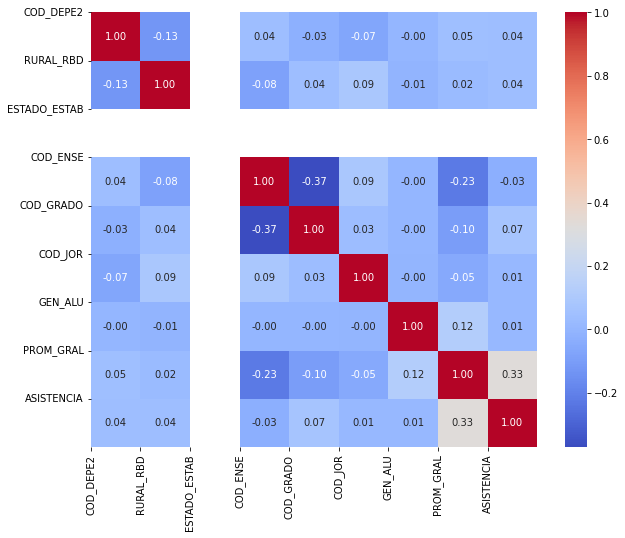

In [17]:
corr = data_heatmap.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [19]:
data_sample = data.sample(n=10000, random_state=42)

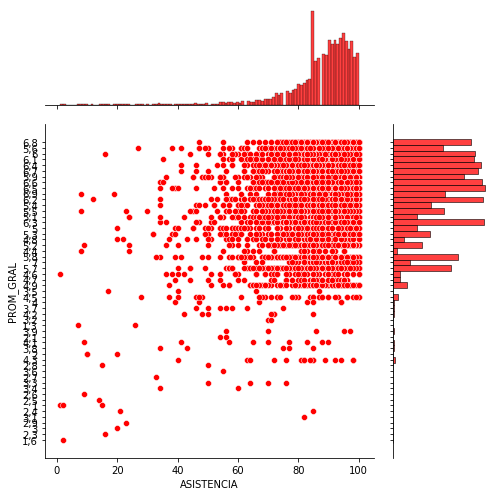

In [20]:
sns.jointplot(x="ASISTENCIA", y="PROM_GRAL", data=data_sample,height=7, ratio=3, color="r")
plt.show()

In [21]:
data_sample['COD_JOR'] = pd.to_numeric(data_sample['COD_JOR'], errors='coerce')
data_sample['COD_JOR'] = data_sample['COD_JOR'].astype(float)
data_sample['PROM_GRAL'] = data_sample['PROM_GRAL'].str.replace(',', '.')
data_sample['PROM_GRAL'] = data_sample['PROM_GRAL'].astype(float)

In [22]:
data_sample_avg = data_sample.groupby('COD_JOR').mean()["PROM_GRAL"]

C:\Users\matie\AppData\Local\Temp\ipykernel_1892\4105789679.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_sample_avg = data_sample.groupby('COD_JOR').mean()["PROM_GRAL"]


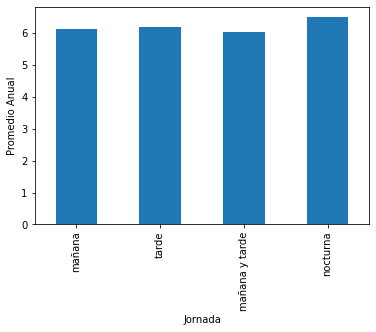

In [25]:
data_sample_avg.plot.bar()
plt.xlabel('Jornada')
plt.ylabel('Promedio Anual')
x_labels = {
    1: 'mañana',
    2: 'tarde',
    3: 'mañana y tarde',
    4: 'nocturna'
}

plt.gca().set_xticklabels([x_labels.get(label) for label in data_sample_avg.index])
plt.show()

In [ ]:
for column in data.columns:
    # Check if the column contains empty strings
    if data[column].dtype == 'object' and '' in data[column].values:
        data[column] = data[column].replace('', np.nan)
        data[column] = data[column].astype(float)
        data[column] = data[column].fillna(0)


In [ ]:
## Clustering mediante TSNE
X = data.drop(["PROM_GRAL", "NOM_RBD", "NOM_COM_ALU"], axis=1)

## Take only 10000 rows of X
X_1 = X.sample(n=10000, random_state=42)

encoded_data = pd.get_dummies(X_1, columns=["COD_DEPE2", "RURAL_RBD", "ESTADO_ESTAB", "COD_ENSE", "COD_GRADO", "COD_JOR", "GEN_ALU", "SIT_FIN_R"]) 
encoded_data = encoded_data.apply(pd.to_numeric, errors='coerce')
encoded_data_1 = encoded_data.dropna()
y = data["PROM_GRAL"]
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(encoded_data_1)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_tsne)


In [ ]:
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=clusters)
plt.title("t-SNE Clustering")
plt.show()
